# Smoke, Sleep, Sloth, and Disparity: Deciphering the County-Level Health Tapestry in America

### Yunuo Wang

# Introduction


### From the haze of tobacco to the disparities of income, we explore how smoking, sleep deprivation, physical inactivity, and economic inequality intertwine to sketch the diverse health landscapes of American counties.



### This concise study aims to unravel the complex tapestry of factors influencing local health, offering a sharp, data-driven insight into the nation's diverse public health landscape.

In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
county_data = pd.read_csv("/Users/wangyunuo/个人文件/大三上/STAT4770/FinalProject/project_4770_7770.csv",
                          index_col='Row.Label')
county_data.groupby('State.Abbreviation')['Poor.Health'].apply(lambda grp: grp.nlargest(5))

State.Abbreviation  Row.Label                    
AK                  AK_Aleutians West Census Area    0.1518
                    AK_Anchorage Borough             0.1303
AL                  AL_Greene County                 0.3410
                    AL_Perry County                  0.3230
                    AL_Sumter County                 0.3198
                                                      ...  
WY                  WY_Fremont County                0.1677
                    WY_Washakie County               0.1613
                    WY_Albany County                 0.1600
                    WY_Carbon County                 0.1593
                    WY_Uinta County                  0.1589
Name: Poor.Health, Length: 245, dtype: float64

# Y variable:Poor Health
## Proportion of county that has a poor health status.

In [98]:
numerical_summary = county_data['Poor.Health'].describe()
print(numerical_summary)

count    2715.000000
mean        0.174385
std         0.045176
min         0.082900
25%         0.140350
50%         0.167300
75%         0.203950
max         0.407300
Name: Poor.Health, dtype: float64


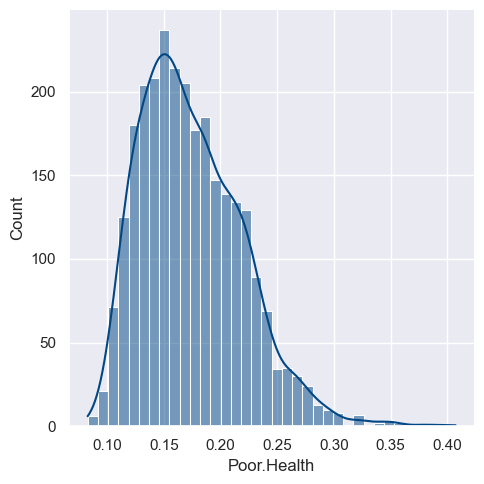

In [99]:
sns.displot(county_data['Poor.Health'], kde=True,color='#004785')
plt.show()
pass

## The data is approximately normally distributed with most counties having a poor health proportion around the 0.15 to 0.25 range.

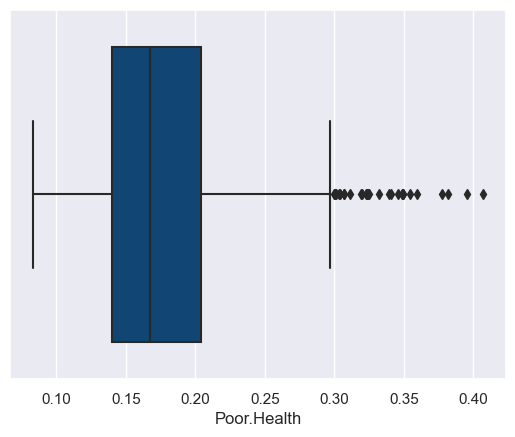

In [100]:
sns.boxplot(x=county_data['Poor.Health'],color='#004785')
plt.show()
pass

## The data shows a central box representing the middle 50% of the data around the median, which appears to be just under 0.20.

# Questions of interest
### Is there a differential impact of physical inactivity, proportion of smokers and physical inactivity onpoor health status across various income inequality quartiles?
### Which variable of insufficient sleep,proportion of smokers,physical inactivty or income inequality has the most significant effect on the poor health?
### What's the interaction between these variables and their combined effect on health outcomes?

# Summary Statistics

In [101]:
# Calculate the mean 'Poor.Health' for each state
state_health_means = county_data.groupby('State.Abbreviation')['Poor.Health'].mean()

# Sort the means in descending order (highest means at the top)
sorted_states = state_health_means.sort_values(ascending=False)

# Select the top 5 and bottom 5 states
top_5_states = sorted_states.head(5)
bottom_5_states = sorted_states.tail(5)

# Display the results
print("Top 5 States with respect to Poor Health:")
print(top_5_states)

print("\nBottom 5 States with respect to Poor Health:")
print(bottom_5_states)

Top 5 States with respect to Poor Health:
State.Abbreviation
AR    0.231626
AL    0.229694
WV    0.225047
MS    0.223572
KY    0.221119
Name: Poor.Health, dtype: float64

Bottom 5 States with respect to Poor Health:
State.Abbreviation
MN    0.123187
RI    0.121780
SD    0.119667
VT    0.116242
CT    0.113317
Name: Poor.Health, dtype: float64


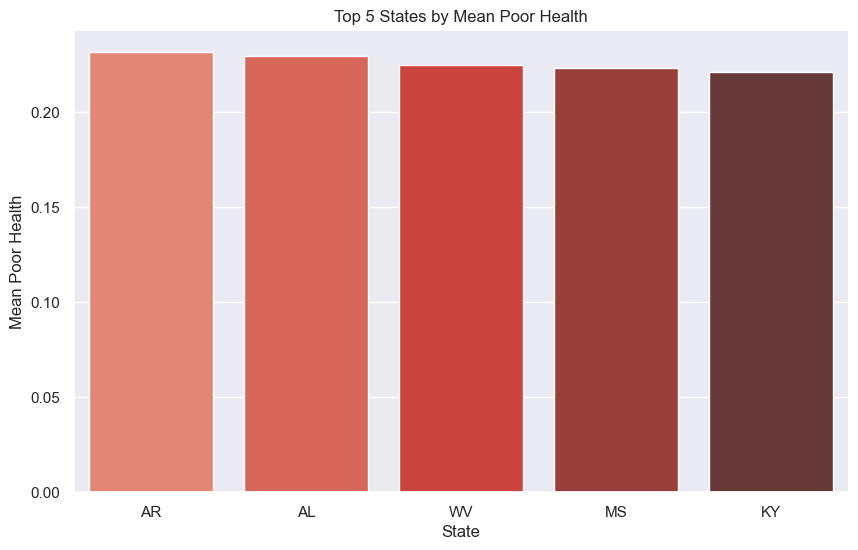

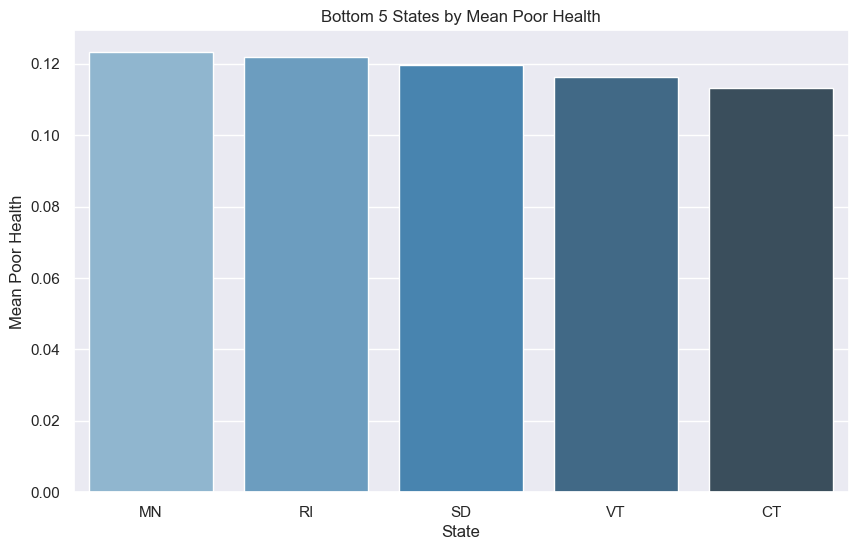

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'county_data' DataFrame is already defined and has the necessary data.

# Calculate the mean 'Poor.Health' for each state
state_health_means = county_data.groupby('State.Abbreviation')['Poor.Health'].mean()

# Sort the means in descending order and select the top 5 and bottom 5 states
top_5_states = state_health_means.sort_values(ascending=False).head(5)
bottom_5_states = state_health_means.sort_values(ascending=False).tail(5)

# Plot for Top 5 States
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_states.index, y=top_5_states.values, palette='Reds_d')
plt.title('Top 5 States by Mean Poor Health')
plt.xlabel('State')
plt.ylabel('Mean Poor Health')
plt.show()

# Plot for Bottom 5 States
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_states.index, y=bottom_5_states.values, palette='Blues_d')
plt.title('Bottom 5 States by Mean Poor Health')
plt.xlabel('State')
plt.ylabel('Mean Poor Health')
plt.show()

In [103]:
county_data.groupby('State.Abbreviation')['Poor.Health'].count()

print(sns.__version__)

0.12.2


## selected x-variables:
### How do I choose my X variable?

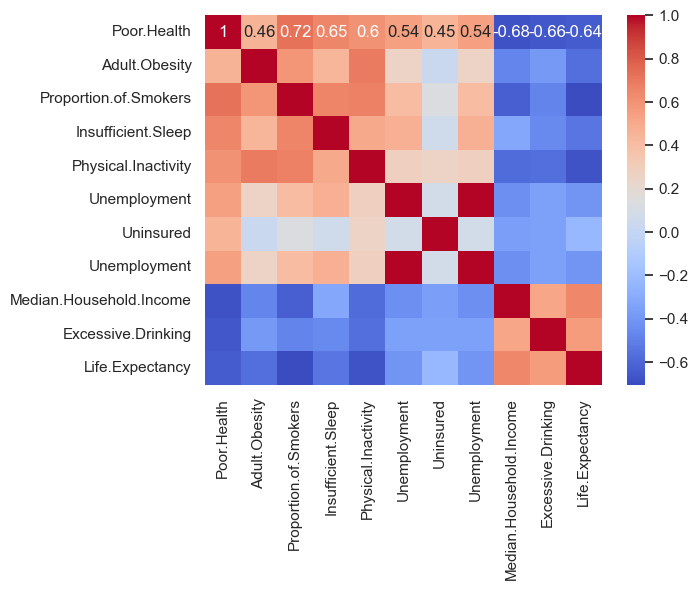

In [104]:
# calculate Pearson correlation coefficient
correlation = county_data[['Poor.Health', 'Adult.Obesity','Proportion.of.Smokers', 'Insufficient.Sleep', 'Physical.Inactivity','Unemployment','Uninsured','Unemployment','Median.Household.Income','Excessive.Drinking','Life.Expectancy']].corr()

# visualize coefficient
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


### In this way I will pick Proportion.of.Smokers,Insufficient.Sleep and physical.inactivity as my X variables.

In [105]:
print(county_data[['Proportion.of.Smokers', 'Insufficient.Sleep', 'Physical.Inactivity', 'Income.Inequality.Quartile']].describe())


       Proportion.of.Smokers  Insufficient.Sleep  Physical.Inactivity
count            2715.000000         2715.000000          2715.000000
mean                0.178243            0.332777             0.255718
std                 0.034748            0.040986             0.051730
min                 0.067354            0.230300             0.084000
25%                 0.152513            0.303900             0.221000
50%                 0.173543            0.332000             0.256000
75%                 0.202849            0.362750             0.291000
max                 0.331744            0.467100             0.451000


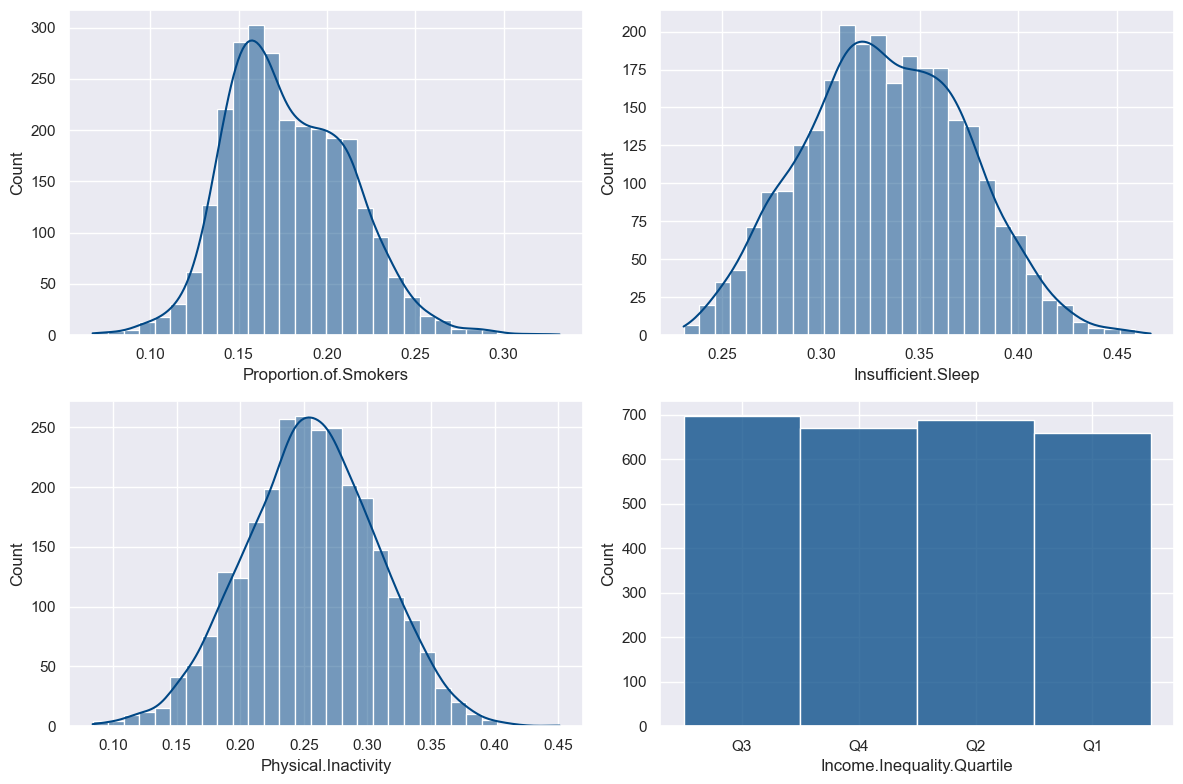

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(county_data['Proportion.of.Smokers'], bins=30, kde=True, ax=axes[0, 0],color='#004785')
sns.histplot(county_data['Insufficient.Sleep'], bins=30, kde=True, ax=axes[0, 1],color='#004785')
sns.histplot(county_data['Physical.Inactivity'], bins=30, kde=True, ax=axes[1, 0],color='#004785')
sns.histplot(county_data['Income.Inequality.Quartile'], bins=4, kde=False, ax=axes[1, 1],color='#004785')

plt.tight_layout()
plt.show()

# The relationship between y and selected x-variables.

In [107]:
import statsmodels.formula.api as smf
simple_model = smf.ols(formula='Q("Poor.Health") ~ Q("Proportion.of.Smokers")+Q("Insufficient.Sleep")+Q("Physical.Inactivity")', data=county_data)
simple_res = simple_model.fit()
print(simple_res.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1333.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:54:03   Log-Likelihood:                 5787.4
No. Observations:                2715   AIC:                        -1.157e+04
Df Residuals:                    2711   BIC:                        -1.154e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

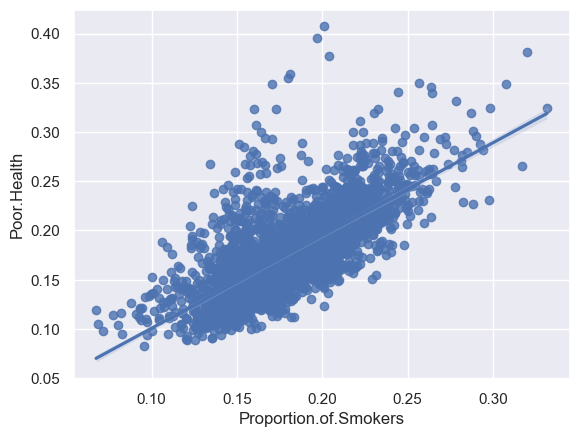

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     2986.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:54:03   Log-Likelihood:                 5564.6
No. Observations:                2715   AIC:                        -1.113e+04
Df Residuals:                    2713   BIC:                        -1.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [108]:
sns.regplot(x="Proportion.of.Smokers", y="Poor.Health", data=county_data);
plt.show()
pass

import statsmodels.formula.api as smf
simple_model = smf.ols(formula='Q("Poor.Health") ~ Q("Proportion.of.Smokers")', data=county_data)
simple_res = simple_model.fit()
print(simple_res.summary())

### The scatter plot indicates a positive correlation between the proportion of smokers and poor health: as the proportion of smokers increases, so does the measure of poor health. The statistical analysis supports this with a significant coefficient of 0.9411, meaning that poor health is likely to increase by about 0.9411 units for each unit increase in the proportion of smokers.

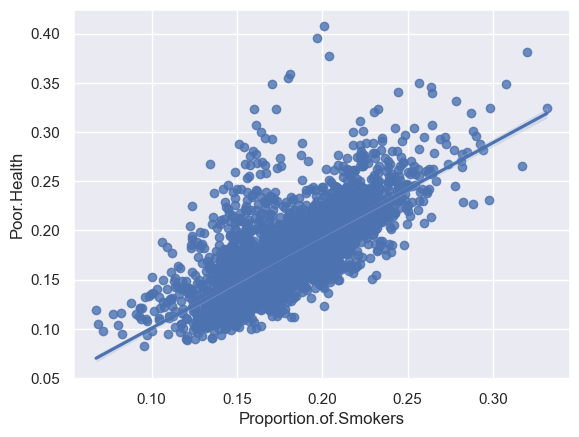

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     2986.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:54:04   Log-Likelihood:                 5564.6
No. Observations:                2715   AIC:                        -1.113e+04
Df Residuals:                    2713   BIC:                        -1.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [109]:
sns.regplot(x="Proportion.of.Smokers", y="Poor.Health", data=county_data);
plt.show()
pass

import statsmodels.formula.api as smf
simple_model = smf.ols(formula='Q("Poor.Health") ~ Q("Proportion.of.Smokers")', data=county_data)
simple_res = simple_model.fit()
print(simple_res.summary())

### The data shows a positive relationship between insufficient sleep and poor health, with a significant coefficient of 0.5920, indicating that as insufficient sleep increases, so does poor health. The relationship is statistically strong.

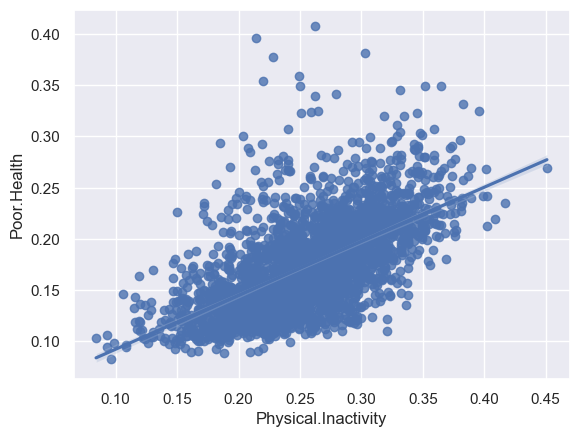

                               OLS Regression Results                               
Dep. Variable:     Q("Physical.Inactivity")   R-squared:                       0.364
Model:                                  OLS   Adj. R-squared:                  0.364
Method:                       Least Squares   F-statistic:                     1551.
Date:                      Thu, 21 Dec 2023   Prob (F-statistic):          9.88e-269
Time:                              14:54:04   Log-Likelihood:                 4803.0
No. Observations:                      2715   AIC:                            -9602.
Df Residuals:                          2713   BIC:                            -9590.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [110]:
sns.regplot(x="Physical.Inactivity", y="Poor.Health", data=county_data);
plt.show()
pass

simple_model = smf.ols(formula='Q("Physical.Inactivity") ~ Q("Poor.Health")', data=county_data)
simple_res = simple_model.fit()
print(simple_res.summary())

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Q1 to Q4
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Poor.Health                 4 non-null      float64
 1   Income.Inequality.Quartile  4 non-null      object 
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 2715 entries, AL_Autauga County to WY_Weston County
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Five-digit.FIPS.Code              2715 non-null   int64  
 1   State.FIPS.Code                   2715 non-null   int64  
 2   County.FIPS.Code                  2715 non-null   int64  
 3   State.Abbreviation                2715 non-null   object 
 4   CountyName                        2715 non-null   object 
 5   Poor.Health                       2715 non-

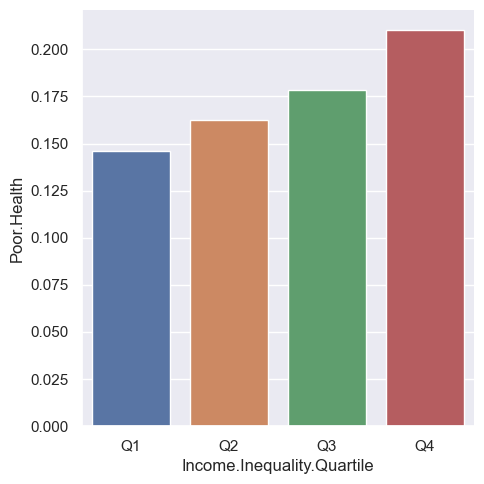

In [111]:
#county_data.info()

statesgroupsascend = county_data.groupby('Income.Inequality.Quartile')['Poor.Health'].mean().sort_values(ascending = True)


type(statesgroupsascend)
tmp = pd.DataFrame(statesgroupsascend)
tmp['Income.Inequality.Quartile'] = tmp.index
tmp.info()
sns.catplot(data=tmp, y="Poor.Health", x='Income.Inequality.Quartile', kind="bar")
county_data.info()

# relationships between selected x-variables.

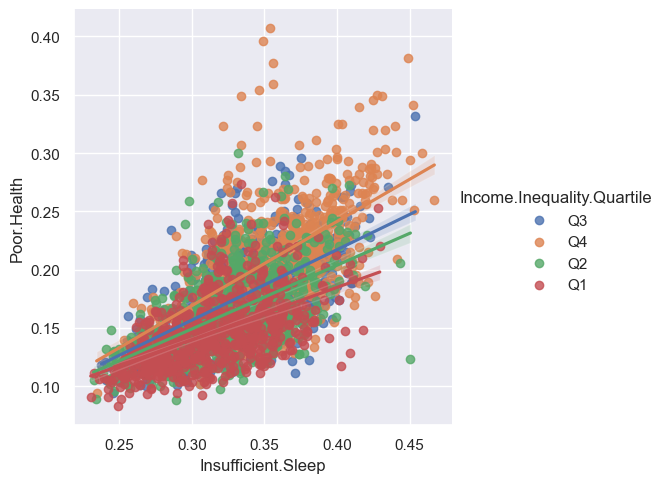

In [112]:
sns.lmplot(x="Insufficient.Sleep", y="Poor.Health", hue='Income.Inequality.Quartile',data=county_data); 
plt.show()
pass 

### The plot shows that insufficient sleep correlates with poor health across all income inequality quartiles, but the relationship is stronger in higher quartiles, suggesting that income inequality may intensify the impact of insufficient sleep on health.

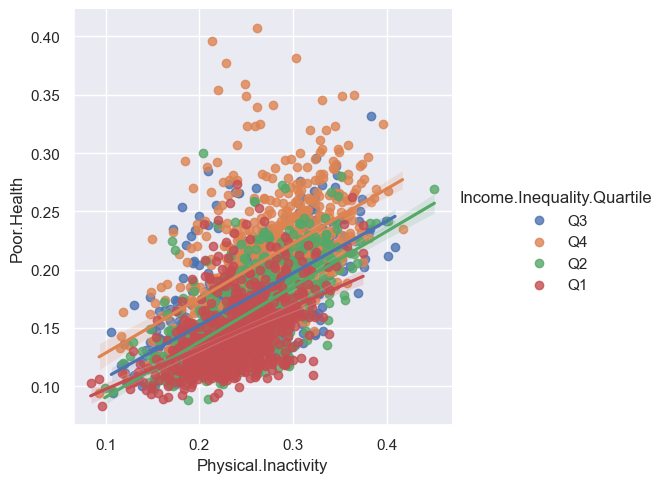

In [113]:
sns.lmplot(x="Physical.Inactivity", y="Poor.Health", hue='Income.Inequality.Quartile',data=county_data); 
plt.show()
pass 

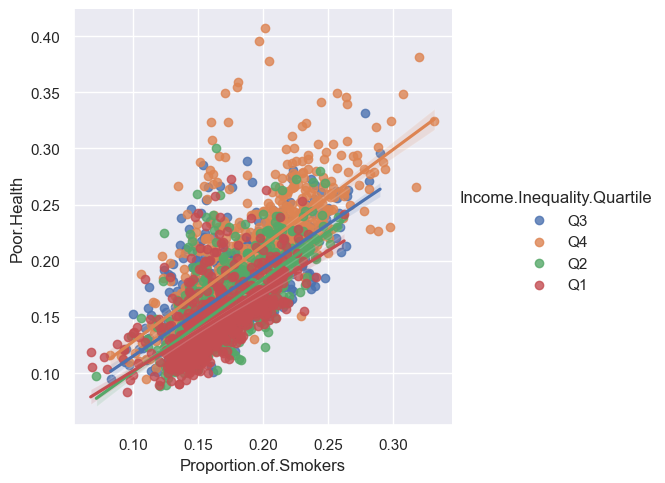

In [114]:
sns.lmplot(x="Proportion.of.Smokers", y="Poor.Health", hue='Income.Inequality.Quartile',data=county_data); 
plt.show()
pass 

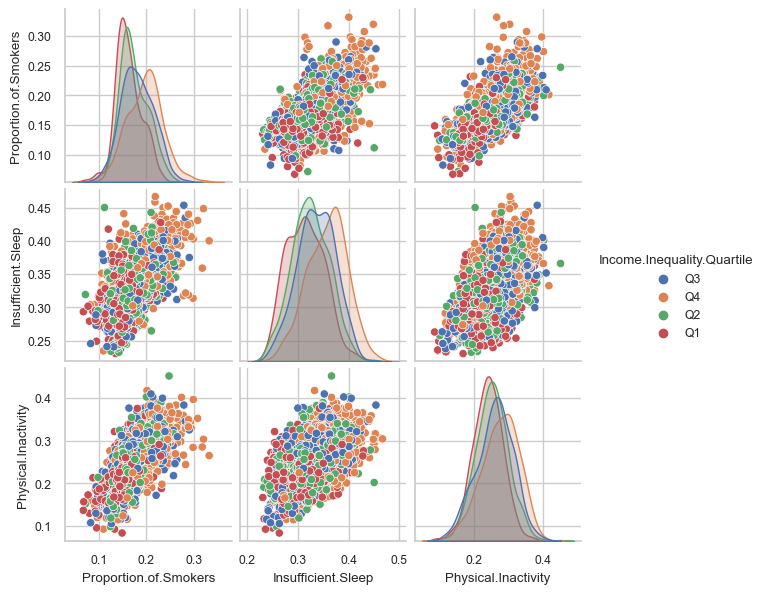

In [115]:
scatterplot_vars = ['Proportion.of.Smokers', 'Insufficient.Sleep','Physical.Inactivity','Income.Inequality.Quartile']
tmp_data = county_data[scatterplot_vars].copy()  
sns.set(style="whitegrid", font_scale=0.8)
pairplot = sns.pairplot(tmp_data, hue='Income.Inequality.Quartile', height=2)
plt.show()

### The relationship appears consistent, with some variations in the strength of correlation across different levels of income inequality. The density plots suggest greater variability in health behaviors in areas with higher income inequality.

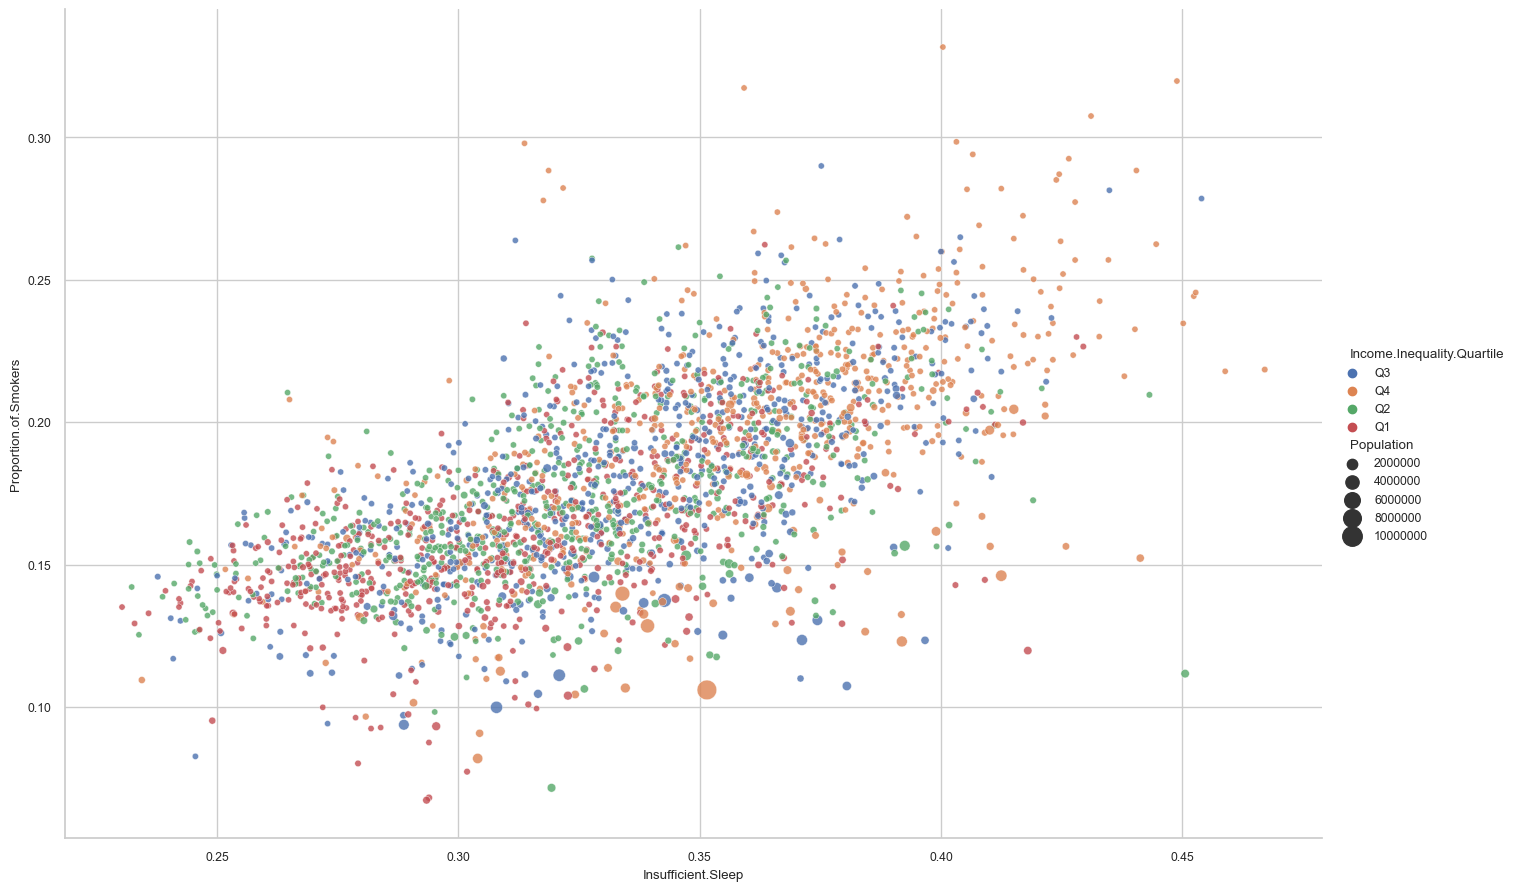

In [116]:
plot1 = sns.relplot(x='Insufficient.Sleep', y='Proportion.of.Smokers', data=county_data,
                    hue="Income.Inequality.Quartile", height=9, aspect=1.5, size = 'Population', sizes=(20,200), alpha=0.8);

plt.show()
pass

### The scatter plot does not show a clear correlation between the proportion of smokers and insufficient sleep across different income inequality quartiles and population sizes; the variables appear to be largely independent of each other.

In [117]:

smokers = county_data['Proportion.of.Smokers']
obesity = county_data['Adult.Obesity']
inactivity = county_data['Physical.Inactivity']


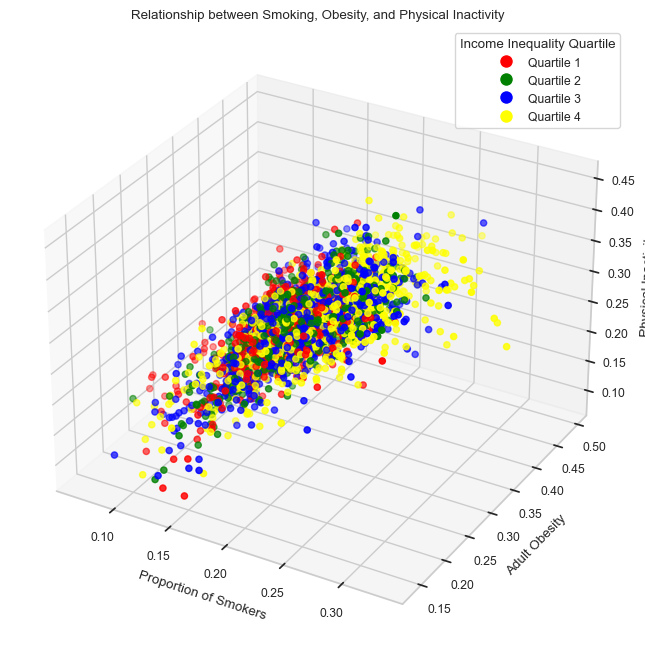

In [118]:


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


income_quartile = county_data['Income.Inequality.Quartile']


colors = {'Q1': 'red', 'Q2': 'green', 'Q3': 'blue', 'Q4': 'yellow'}
scatter = ax.scatter(smokers, obesity, inactivity, c=[colors[q] for q in income_quartile])


legend_labels = {'Q1': 'Quartile 1', 'Q2': 'Quartile 2', 'Q3': 'Quartile 3', 'Q4': 'Quartile 4'}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[q],
                      markersize=10, markerfacecolor=colors[q]) for q in legend_labels]
ax.legend(handles=handles, title="Income Inequality Quartile")


ax.set_title('Relationship between Smoking, Obesity, and Physical Inactivity')
ax.set_xlabel('Proportion of Smokers')
ax.set_ylabel('Adult Obesity')
ax.set_zlabel('Physical Inactivity')

plt.show()


# Create a regression  tree.

In [119]:
Xcat=county_data.filter(items=['Income.Inequality.Quartile'])
Xcat=pd.get_dummies(Xcat['Income.Inequality.Quartile'])
Xcat

,Q1,Q2,Q3,Q4
Row.Label,,,,
AL_Autauga County,False,False,True,False
AL_Baldwin County,False,False,True,False
AL_Barbour County,False,False,False,True
AL_Bibb County,False,True,False,False
AL_Blount County,False,True,False,False
...,...,...,...,...
WY_Sublette County,True,False,False,False
WY_Sweetwater County,False,True,False,False
WY_Uinta County,False,False,True,False


1.3.2
Mean Squared Error: 0.0009422060628950429


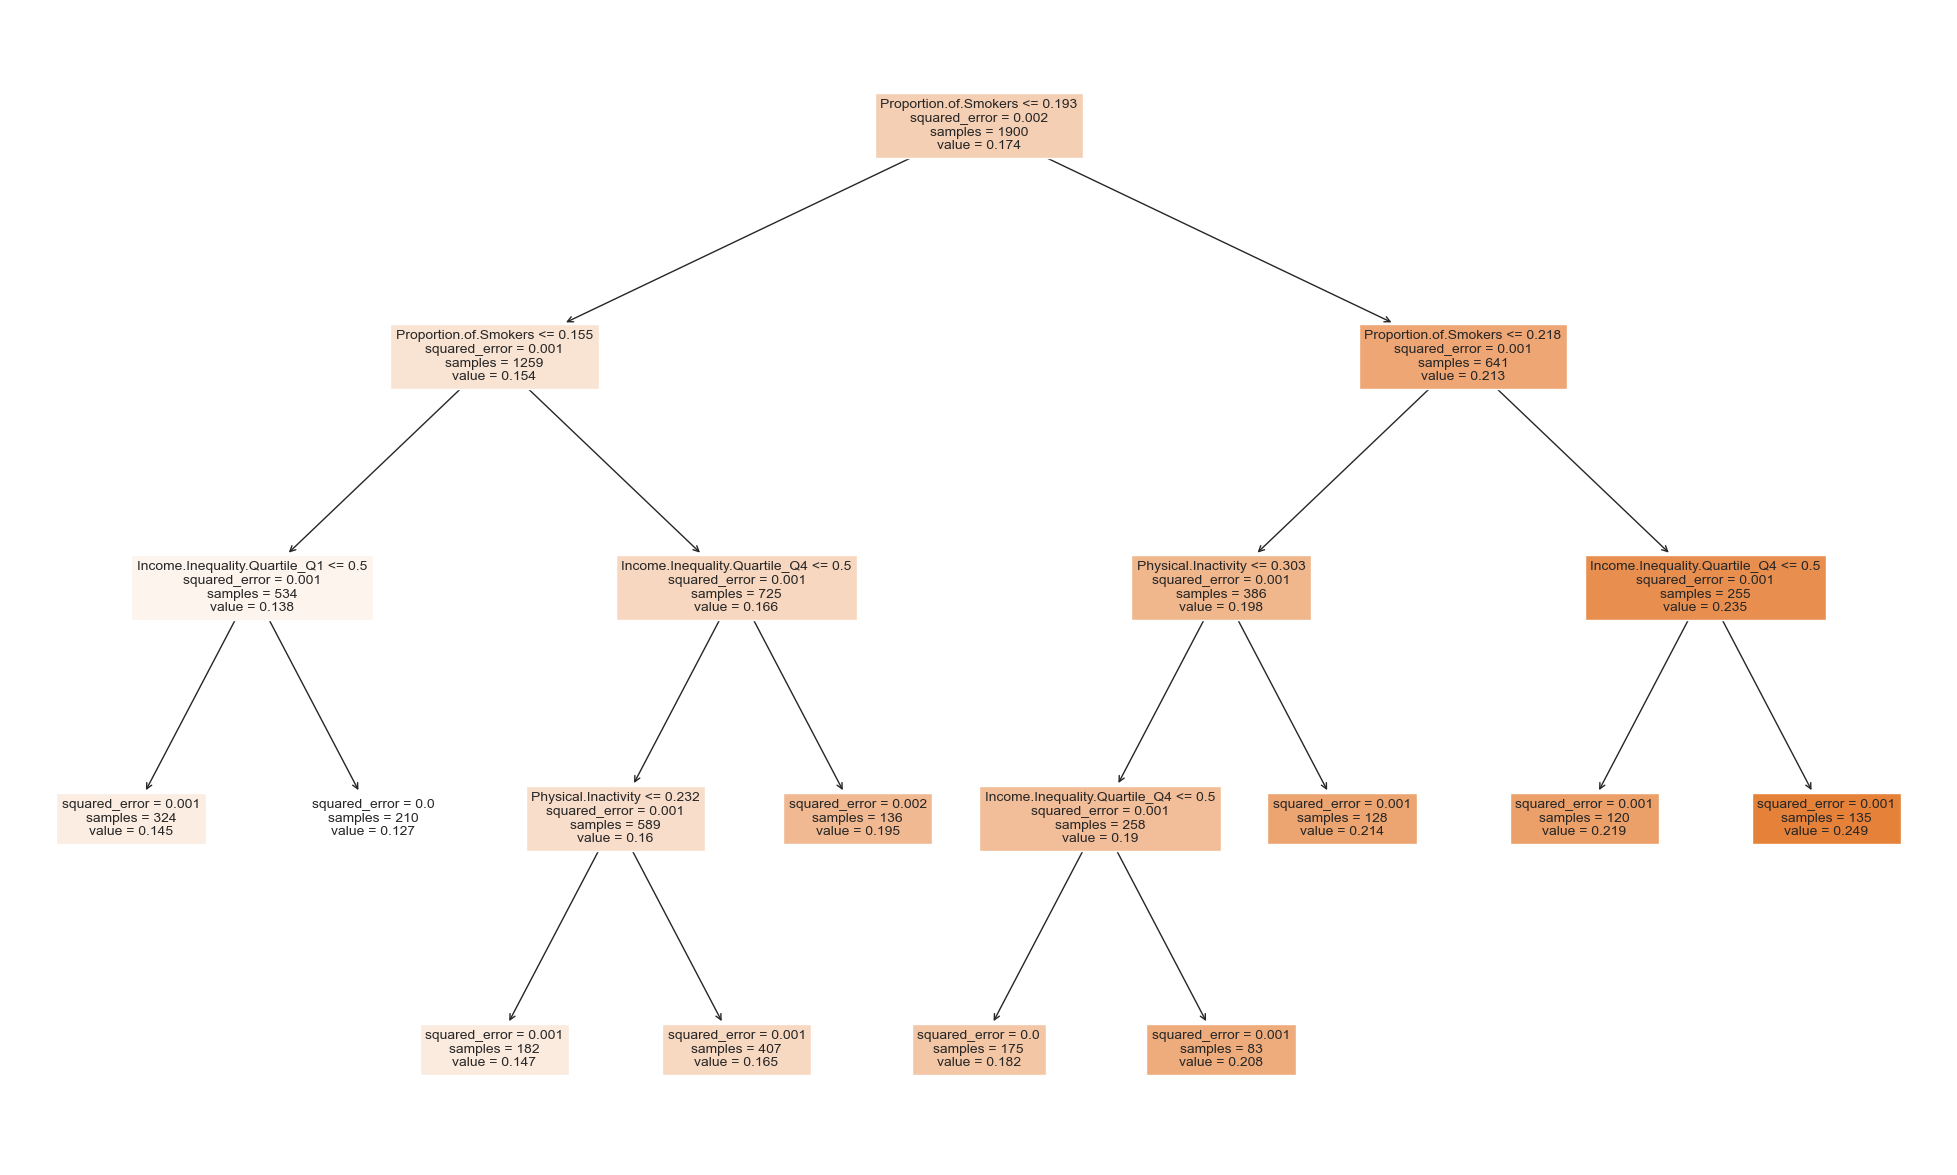

In [120]:
###simple tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import sklearn
print(sklearn.__version__)
#county_data.dropna(inplace=True)
Xcts = county_data[['Proportion.of.Smokers', 'Adult.Obesity','Physical.Inactivity']]
Xcat = county_data[['Income.Inequality.Quartile']]
Xcat = pd.get_dummies(Xcat)
X = pd.merge(Xcts, Xcat, left_index=True, right_index=True)
y = county_data['Poor.Health']

##split the X,y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1940) 


regtree = tree.DecisionTreeRegressor(max_leaf_nodes = 10);
regtree.fit(X_train, y_train);

plt.figure(figsize=(25,15));
tree.plot_tree(regtree, filled=True, feature_names=X.columns, fontsize = 10);


## cross-validation
y_pred = regtree.predict(X_test) # Predict the probabilities.
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

### The 'Proportion.of.Smokers' is the primary splitting variable at the root of the tree and is used again for further splits in the tree, which implies it has a significant effect on 'Poor Health'. Since it is the first variable used to split the data, this suggests it is the most influential variable when predicting 'Poor Health' out of the variables provided in the tree. Although 'Physical.Inactivity' is also used as a split, it occurs further down the tree, which typically indicates a lesser impact compared to 'Proportion.of.Smokers'.

# But how does the model perform?
## Do the crossvalidation!

In [121]:
##do the cross validation
from sklearn.model_selection import cross_val_score



scores = cross_val_score(regtree, X, y, cv=5)  # 5 folds


print("Cross-validation scores:", scores)
print("Average score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.47176409 0.64799892 0.49286526 0.51542686 0.1544643 ]
Average score: 0.45650388738341646
Standard deviation: 0.16304919359646494


### This model has an average performance score of approximately 0.457, with a standard deviation of 0.163.This suggests moderate predictive accuracy with some variation in performance across different subsets of the data. The range of scores (from 0.155 to 0.648) points to potential overfitting or data heterogeneity.

# Rank the variables’ importance in the tree

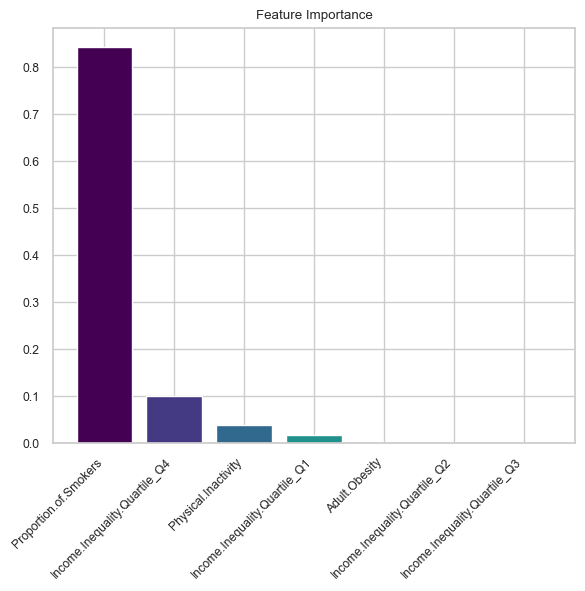

In [122]:
importances = regtree.feature_importances_

# Get feature importances from the model
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])

# Sort the DataFrame to find the most important features
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(6, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(features_sorted)))
plt.bar(feature_importances.index, feature_importances['Importance'], color=colors)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Feature Importance')
plt.tight_layout()  
plt.show()


### The 'Proportion of Smokers' is by far the most important feature, suggesting that smoking is strongly associated with poor health outcomes at the county level. 'Income Inequality Quartile 4', representing the counties with the largest income disparity, is the second most important feature, although its importance is much less compared to smoking. This indicates that higher income inequality is somewhat associated with poor health, potentially due to factors like access to healthcare and resources.'Physical Inactivity' and the other income inequality quartiles (1, 2, and 3) have relatively low importance in predicting 'Poor Health', suggesting that while they are associated with health outcomes.

# One more step--Random Forest

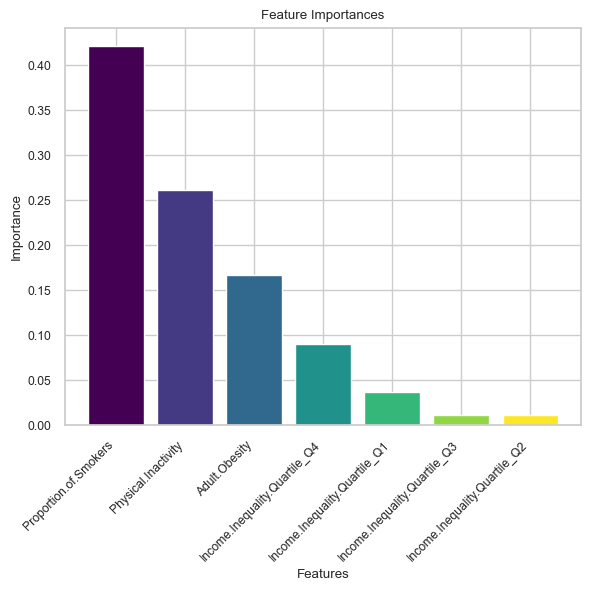

In [123]:
from sklearn.ensemble import RandomForestRegressor


# Get feature importances from the model
importances = rf.feature_importances_

# Convert the feature importances into a DataFrame
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame to find the most important features
features_sorted = features.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(6, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(features_sorted)))
plt.bar(features_sorted['Feature'], features_sorted['Importance'], color=colors)
plt.title('Feature Importances')
plt.xticks(rotation=45,horizontalalignment='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()  # Adjust layout to fit the x labels
plt.show()

### While 'Proportion of Smokers' remains the most important feature, other variables like 'Physical Inactivity' and 'Adult Obesity' also show substantial importance.Physical inactivity becomes the second important feature.RF is a more robust model which reduce the  overfit to a single feature.

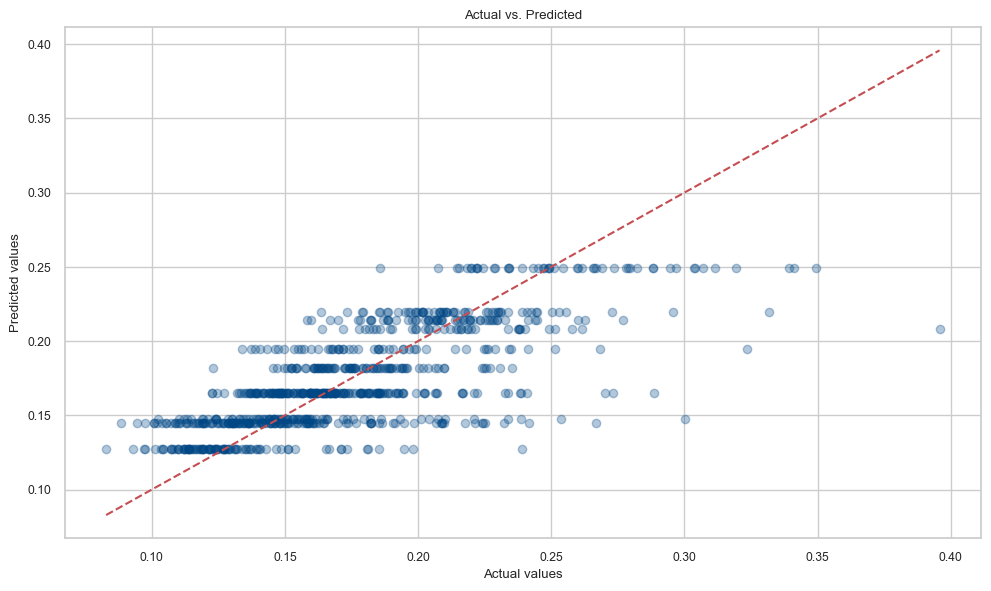

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='#004785')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.tight_layout()
plt.show()

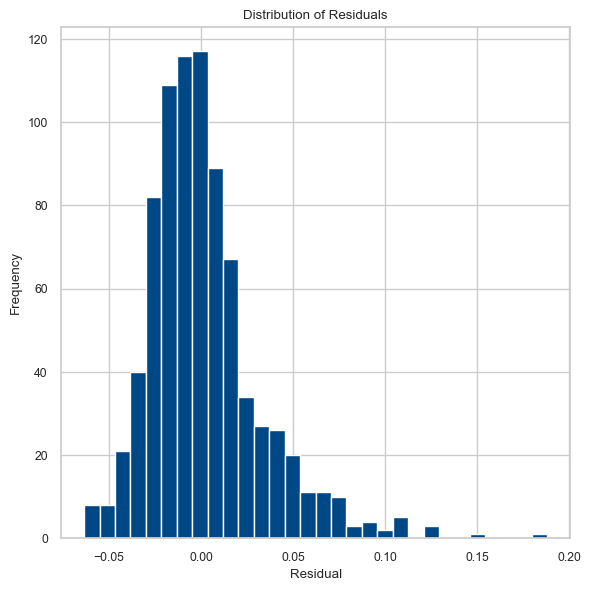

In [125]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 6))
plt.hist(residuals, bins=30, color='#004785')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [126]:
rf.fit(X, y);
##do the cross validation
from sklearn.model_selection import cross_val_score


# cross-validation
scores = cross_val_score(rf, X, y, cv=5)  # 5 folds


print("Cross-validation scores:", scores)
print("Average score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.56725419 0.67530973 0.59688008 0.63959916 0.268114  ]
Average score: 0.5494314336919731
Standard deviation: 0.14538506438383036


### Average Score: The average cross-validation score of approximately 0.549 suggests that the random forest model has better predictive accuracy than the simple regression tree (which had an average score of about 0.457).

### Standard Deviation: The standard deviation of the scores is around 0.145, indicating a moderate level of variation in the model's performance across different data subsets. This is slightly lower than the standard deviation of the simple regression tree model, suggesting more consistent performance.

### Range of Scores: The scores range from about 0.268 to 0.675. The presence of a relatively low score (0.268) might indicate specific subsets of data where the model performs less effectively, or it could suggest some level of overfitting in other areas.

# Conclusions

### 1.The steepest regression line in quartile Q4 (highest income inequality) suggests a stronger association between insufficient sleep and poor health in areas with more income inequality. In contrast, quartiles Q1 (lowest income inequality) and Q2 show a less pronounced association. The strength of the association between insufficient sleep and poor health may be influenced by the level of income inequality within a county.
### 2. Proportion of smockers is the most important predictor in the tree, as it provides the greatest initial partition of the data.
### 3.The combined effect of these variables on health outcomes can be seen in the branches of the tree. Counties with high smoking rates, high physical inactivity, and high income inequality are predicted to have the poorest health outcomes (as indicated by the leaf nodes' value). On the other hand, counties with low smoking rates and low income inequality are predicted to have better health outcomes.

# Suggestions for further research

### 1.Investigate Causality: While the decision tree indicates associations, it does not establish causality. Use statistical methods such as instrumental variables or propensity score matching to delve into the causal relationships.
### 2.Longitudinal Analysis: Analyze data over time to observe the impact of changes in the predictor variables on health outcomes and to account for time-dependent confounding.
### 3.Model Complexity: Explore more complex models such as Gradient Boosting or Neural Networks to capture non-linear relationships and interactions more effectively.